# Using Current Data To Make Recommendations
### Model #1: (Classification - Fully Paid vs. Default) 
### Model #2: ( Regression - Annualized Return %)

In [1]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from functions_and_objects import (impute_means_zeros_maxs_X,parse_percentage,
                                   clean_new_LC_data_classification_current,clean_LC_data_classification_eval,
                                   preprocessing_current, preprocessing_future_test, columns_list, 
                                   nan_max_cols, nan_mean_cols, nan_zero_cols, dtype,
                                   one_hot_encode_current, concat_X_and_6ohe_dfs,
                                   prep_all_df_for_classification, 
                                   view_columns_by_number_of_rows_that_have_nan,
                                   current_pipeline)
from functions_and_objects import (prep_df_for_regression_current,
                                   calc_annu_return,impute_annu_return_to_y,
                                   scale_current)

import joblib
from sklearn.metrics import (accuracy_score, precision_score, recall_score, #classification
                             f1_score, roc_auc_score, roc_curve,precision_recall_fscore_support, #classification
                             r2_score,mean_squared_error) #regression

%load_ext autoreload
%autoreload 2

### Import New Data from 2018-2019

- These files contain complete loan data for all loans issued through the time period stated, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. The file containing loan data through the "present" contains complete loan data for all loans issued through the previous completed calendar quarter.

In [2]:
raw_q12019 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2019Q1.csv',header=1)
raw_q42018 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2018Q4.csv',header=1)
raw_q32018 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2018Q3.csv',header=1)
raw_q22018 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2018Q2.csv',header=1)
raw_q12018 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2018Q1.csv',header=1)
dfs_list = [raw_q42018,
            raw_q32018,
            raw_q22018,
            raw_q12018]

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,144,145,146) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,129,130,131,134,135,136,139,144,145,146) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(raw_q42018.shape)
print(raw_q32018.shape)
print(raw_q22018.shape)
print(raw_q12018.shape)


(128414, 150)
(128196, 150)
(130774, 150)
(107866, 150)


### Load DF from Pipeline

In [ ]:
final_df = current_pipeline(dfs_list, 'nn_v2.joblib', 'ridge_lin_reg_v1.joblib')

/home/jupyter/peervest/functions_and_objects.py:275: FutureWarning: Passing datetime64-dtype data to TimedeltaIndex is deprecated, will raise a TypeError in a future version
  raw_lc_df['earliest_cr_line'] = pd.to_timedelta(pd.to_datetime(raw_lc_df['earliest_cr_line'])).dt.days
Using TensorFlow backend.
W0704 07:30:44.953203 140521274767104 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0704 07:30:44.972275 140521274767104 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0704 07:30:44.995855 140521274767104 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_de

In [7]:
len(final_df)

361423

### Try it Manually

In [9]:
clean_lc_df_current = clean_new_LC_data_classification_current(dfs_list)
X_current, y_current = preprocessing_current(clean_lc_df_current)
(ohe_home_ownership, ohe_purpose, ohe_zip_code, 
 ohe_application_type, ohe_sub_grade, ohe_emp_title_2) = one_hot_encode_current(X_current)
X_current_classif = concat_X_and_6ohe_dfs(X_current, ohe_home_ownership, ohe_purpose, ohe_zip_code,
                                      ohe_application_type, ohe_sub_grade, ohe_emp_title_2)
X_current_regr = concat_X_and_6ohe_dfs(X_current, ohe_home_ownership, ohe_purpose, ohe_zip_code, 
                                   ohe_application_type, ohe_sub_grade, ohe_emp_title_2)
prep_all_df_for_classification(X_current_classif) #drops columns in place
class_model = joblib.load('nn_v1.joblib')

/home/jupyter/peervest/functions_and_objects.py:275: FutureWarning: Passing datetime64-dtype data to TimedeltaIndex is deprecated, will raise a TypeError in a future version
  raw_lc_df['revol_util'] = raw_lc_df['revol_util'].apply(parse_percentage)


In [16]:
current_class_preds_proba = class_model.predict_proba(X_current_classif)

In [31]:
class_model.predict(X_current_classif)

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

(array([3.43481e+05, 0.00000e+00, 5.00000e+00, 0.00000e+00, 3.00000e+00,
        1.00000e+00, 2.00000e+00, 2.00000e+00, 1.00000e+00, 0.00000e+00,
        2.00000e+00, 0.00000e+00, 1.00000e+00, 2.00000e+00, 1.00000e+00,
        2.00000e+00, 1.00000e+00, 1.00000e+00, 4.00000e+00, 1.79140e+04]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ],
       dtype=float32),
 <a list of 20 Patch objects>)

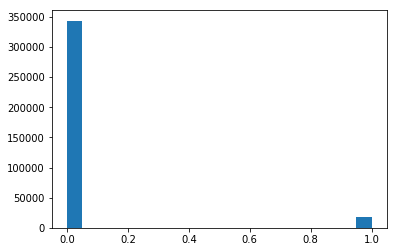

In [17]:
plt.hist(current_class_preds_proba,bins=20,range=(0,1))

In [ ]:
log_class_model = joblib.load('log_reg_v1.joblib')
current_log_class_preds_proba = log_class_model.predict_proba(X_current_classif)

In [23]:
log_class_model.classes_

array([0, 1])

In [24]:
log_class_model.predict_proba(X_current_classif)

array([[1.00000000e+000, 1.14157034e-054],
       [1.00000000e+000, 5.55403628e-033],
       [1.00000000e+000, 0.00000000e+000],
       ...,
       [1.00000000e+000, 1.87138864e-039],
       [1.00000000e+000, 1.27723813e-053],
       [1.00000000e+000, 5.72918063e-107]])

(array([3.59922e+05, 2.60000e+01, 1.60000e+01, 1.40000e+01, 4.00000e+00,
        5.00000e+00, 4.00000e+00, 6.00000e+00, 5.00000e+00, 6.00000e+00,
        1.00000e+01, 1.00000e+01, 7.00000e+00, 2.00000e+00, 7.00000e+00,
        4.00000e+00, 1.30000e+01, 1.40000e+01, 1.40000e+01, 1.33400e+03]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

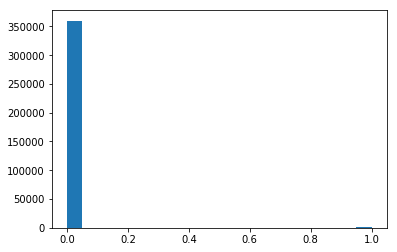

In [22]:
plt.hist(current_log_class_preds_proba[:,1],bins=20,range=(0,1))

# Recommendation Table

# Recommendation Summary Values

# Recommendation Descriptive Visuals